# Exploratory Data Analysis in SQL for Absolute Beginners

We'll be working with data from the **Climate change adaptation innovation in the water sector in Africa** paper which can be found [here](https://www.sciencedirect.com/science/article/pii/S2352340922009854).

This study looked at the response of technology to water vulnerability created by climate change in Africa.

The data used for adaptation technology was water-related patent data.
The water stress index accounts for things like projected change of annual runoff, projected change of annual groundwater recharge, fresh water withdrawal rate, water dependency ratio, dam capacity, and access to reliable drinking water. A higher index indicates higher vulnerability.

The other variables are used to define the country's size (GDP), institutional effectiveness, research and development activity, and knowledge base.

The fields included in this dataset are:
- year (data has been pooled for the following years: 1990, 2000, 2005, and 2010 to 2016)
- adaptation technologies
- openness to trade (trade as percentage of gross domestic product)
- time required to register property (calendar days)
- gross domestic product per capita
- employers (total)
- gross enrolment ratio
- water stress index

Note that we have shortened the field names in our dataset for easier coding!

## Query the table

In [7]:
import psycopg2
import pandas as pd 

In [8]:
# Datos de conexión// Conection Data
port = 5432
hostname = "workspacedemodb.datacamp.com"
database = "climate"
username = "climate_sqlcodealong"
password = "climate_sqlcodealong"

# Establecer conexión
connection = psycopg2.connect(
    host=hostname,
    port=port,
    database=database,
    user=username,
    password=password
)

# Cerrar el cursor y la conexión
#cursor.close()
#onnection.close()


In [9]:
#1. Query the full table
#SELECT *
#FROM climate;

cursor = connection.cursor()
query = """
    SELECT *
    FROM climate;
"""
cursor.execute(query)
cursor.execute(query)
results= cursor.fetchall()

column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)
display(df)

,country,country_id,year,water_related_adaptation_tech,trade,days_to_register_property,gdp_per_capita,employers,gross_enrolment_ratio,water_stress_index
0,Algeria,1,1990,0.0,48.380714,NaN,10300.015042,NaN,92.59344,NaN
1,Algeria,1,2000,0.0,62.863795,NaN,10257.741569,6.993,105.16491,0.302660
2,Algeria,1,2005,0.0,71.277440,74.0,12370.892005,5.239,107.58610,0.319612
3,Algeria,1,2010,0.0,69.867572,55.0,12919.491054,3.699,115.33758,0.342618
4,Algeria,1,2011,0.0,67.473455,55.0,13046.128511,3.438,116.56791,0.347353
...,...,...,...,...,...,...,...,...,...,...
495,Zimbabwe,50,2012,0.0,74.162535,36.0,2486.847930,0.488,112.51679,0.298693
496,Zimbabwe,50,2013,0.0,58.656494,36.0,2491.635140,0.480,109.89279,0.299107
497,Zimbabwe,50,2014,0.0,54.671615,36.0,2506.490220,0.479,NaN,0.299521
498,Zimbabwe,50,2015,0.0,56.748811,36.0,2509.008140,0.476,NaN,0.299935


In [10]:
df.isnull().sum()

country                            0
country_id                         0
year                               0
water_related_adaptation_tech    125
trade                             40
days_to_register_property        119
gdp_per_capita                    29
employers                         59
gross_enrolment_ratio             88
water_stress_index                68
dtype: int64

2. Query the `country` and `water_stress_index` fields and order by descending order of the `water_stress_index` field

In [11]:
#SELECT country, water_stress_index
#FROM climate
#ORDER BY water_stress_index DESC;

cursor = connection.cursor()
query = """
    SELECT country, water_stress_index
    FROM climate
    ORDER BY water_stress_index DESC;
"""
cursor.execute(query)
cursor.execute(query)
results= cursor.fetchall()

column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)
display(df)

,country,water_stress_index
0,Kenya,NaN
1,Eswatini,NaN
2,Eswatini,NaN
3,Eswatini,NaN
4,Nigeria,NaN
...,...,...
495,Djibouti,0.042673
496,Djibouti,0.042673
497,Djibouti,0.042425
498,Djibouti,0.042425


3. Query the `country`, `year`, and `gdp_per_capita` field to get a list of the **distinct** country names and their respective GDP; order by the GDP in _ascending_ order but only view the top 10 values

In [12]:
#SELECT DISTINCT(country), year, gdp_per_capita
#FROM climate
#ORDER BY gdp_per_capita
#LIMIT 10;

cursor = connection.cursor()
query = """
    SELECT DISTINCT(country), year, gdp_per_capita
    FROM climate
    ORDER BY gdp_per_capita
    LIMIT 10;
"""
cursor.execute(query)
cursor.execute(query)
results= cursor.fetchall()

column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)
display(df)


,country,year,gdp_per_capita
0,Mozambique,1990,473.401824
1,Ethiopia,2000,621.159817
2,Mozambique,2000,633.458591
3,Ethiopia,1990,654.657557
4,CAR,2014,672.681648
5,CAR,2013,674.589742
6,Burundi,2016,689.014892
7,Burundi,2005,692.569819
8,CAR,2015,697.327495
9,Burundi,2015,715.549886


## Filter the data

4. Filter the data to see the `country` and `year` where the `water_stress_index` was between `0.5` and `0.6`

In [13]:
cursor = connection.cursor()
query = """
    SELECT country, year, water_stress_index
    FROM climate
    WHERE water_stress_index BETWEEN 0.5 AND 0.6;
"""
cursor.execute(query)
cursor.execute(query)
results= cursor.fetchall()

column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)
display(df)

,country,year,water_stress_index
0,Ethiopia,2000,0.510202
1,Kenya,2000,0.508818
2,Kenya,2005,0.505701
3,Kenya,2010,0.505538
4,Kenya,2011,0.504223
5,Kenya,2012,0.502908
6,Kenya,2013,0.501801
7,Kenya,2014,0.500486
8,Kenya,2015,0.500621
9,Kenya,2016,0.500621


5. This time, filter the data to see the countries that start with the letter `E` or `S` and have a `water_stress_index` above `0.5`

In [14]:
cursor = connection.cursor()
query = """
    SELECT country, year, water_stress_index
    FROM climate
    WHERE water_stress_index > 0.5 AND (country LIKE 'E%' OR country LIKE 'S%');
"""
cursor.execute(query)
cursor.execute(query)
results= cursor.fetchall()

column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)
display(df)



,country,year,water_stress_index
0,Ethiopia,2000,0.510202
1,Somalia,2000,0.559159
2,Somalia,2005,0.549154
3,Somalia,2010,0.542943
4,Somalia,2011,0.542322
5,Somalia,2012,0.542322
6,Somalia,2013,0.542322
7,Somalia,2014,0.542322
8,Somalia,2015,0.542322
9,Somalia,2016,0.542322


## Aggregate, group, and sort the data

6. See what the average `water_related_adaptation_tech` value is for each country across all of the years and order by descending order of this average

In [15]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
#plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from IPython.display import display

,country,avg_water_tech
0,South Africa,3.166
1,Egypt,2.008
2,Morocco,1.200
3,Kenya,0.250
4,Tunisia,0.233
5,Madagascar,0.200
6,Algeria,0.150
7,Senegal,0.125
8,Cabo Verde,0.100
9,Guinea,0.100


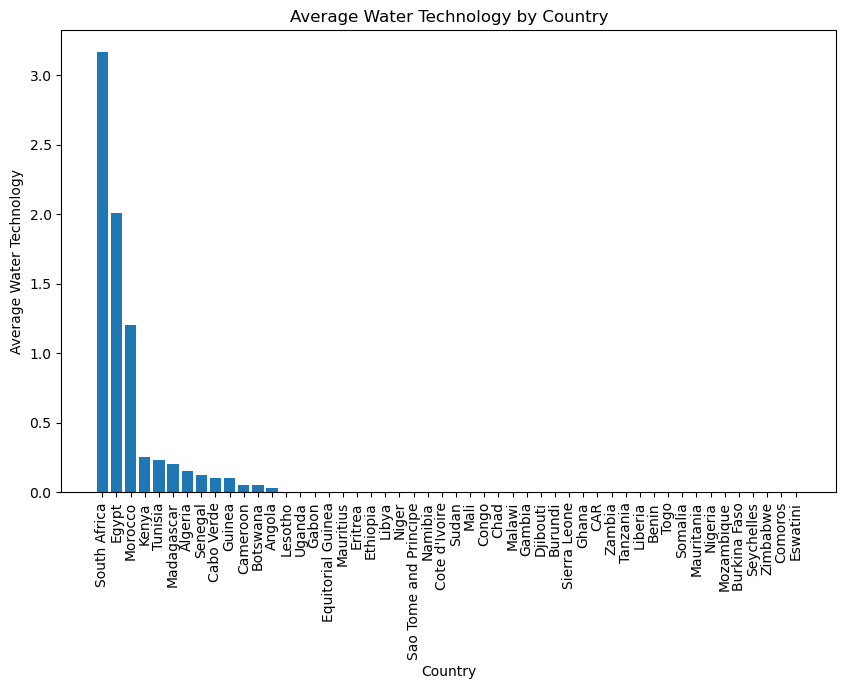

In [16]:
cursor = connection.cursor()
query = """
    SELECT country, AVG(water_related_adaptation_tech) AS avg_water_tech
    FROM climate
    GROUP BY country
    ORDER BY avg_water_tech DESC;   
"""
cursor.execute(query)

results= cursor.fetchall()

column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)
display(df.head(15))

plt.figure(figsize=(10, 6))
plt.bar(df['country'], df['avg_water_tech'])
plt.xlabel('Country')
plt.ylabel('Average Water Technology')
plt.title('Average Water Technology by Country')
plt.xticks(rotation=90)
plt.show()


In [17]:
data = [
    go.Bar(
        x=df['country'],
        y=df['avg_water_tech']
    )
]

# Configurar el diseño del gráfico
layout = go.Layout(
    title='Average Water Technology by Country',
    xaxis=dict(title='Country'),
    yaxis=dict(title='Average Water Technology'),
    xaxis_tickangle=-45
)

# Crear la figura y mostrar el gráfico utilizando Plotly
fig = go.Figure(data=data, layout=layout)
fig.show()

7. Find the countries that have an average `water_related_adaptation_tech` value greater than `1`, and list only the countries

In [18]:
cursor = connection.cursor()
query = """
    SELECT country
    FROM climate
    GROUP BY country
    HAVING AVG(water_related_adaptation_tech) > 1;
"""
cursor.execute(query)
cursor.execute(query)
results= cursor.fetchall()

column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)
display(df)



,country
0,Egypt
1,Morocco
2,South Africa


## No code plots!

In [19]:
import pandas as pd


In [20]:
data = pd.read_csv("./climate.csv")

In [21]:
data

,country,country_id,year,water_related_adaptation_tech,trade,days_to_register_property,gdp_per_capita,employers,gross_enrolment_ratio,water_stress_index
0,Algeria,1,1990,0.0,48.380714,NaN,10300.015042,NaN,92.59344,NaN
1,Algeria,1,2000,0.0,62.863795,NaN,10257.741569,6.993,105.16491,0.302660
2,Algeria,1,2005,0.0,71.277440,74.0,12370.892005,5.239,107.58610,0.319612
3,Algeria,1,2010,0.0,69.867572,55.0,12919.491054,3.699,115.33758,0.342618
4,Algeria,1,2011,0.0,67.473455,55.0,13046.128511,3.438,116.56791,0.347353
...,...,...,...,...,...,...,...,...,...,...
495,Zimbabwe,50,2012,0.0,74.162535,36.0,2486.847930,0.488,112.51679,0.298693
496,Zimbabwe,50,2013,0.0,58.656494,36.0,2491.635140,0.480,109.89279,0.299107
497,Zimbabwe,50,2014,0.0,54.671615,36.0,2506.490220,0.479,NaN,0.299521
498,Zimbabwe,50,2015,0.0,56.748811,36.0,2509.008140,0.476,NaN,0.299935


In [22]:
# Cerrar el cursor y la conexión
cursor.close()
connection.close()